# 영국시장의 중고 자동차 가격 데이터 다루기

주 데이터: cars.csv  
보조자료: brand.csv

목표: 배웠던 내용을 최대한 활용하여 다양하게 데이터를 변환


Step 1. 이것만큼은 꼭 해보세요!
1. cars.csv와 brand.csv의 데이터 합치기
    - [힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있다.
2. 카테고리형 변수를 숫자 형태로 변환하기
    - [힌트] Engine, Emission Class 변수 주목
3. 결측치 처리하기
    - [힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거
4. Scaler 활용해보기
    - 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)  
</br>

Step 2. 이런것도 해볼 수 있어요!
1. 국가별 총 브랜드 개수는?
2. 상관관계가 높은 변수들이 있는지 확인
</br>  </br>     

평가
1. 데이터의 결합하고, 데이터를 그룹화 하여 요약된 정보로 나타낼 수 있는가?	
    - 데이터 결합 및 그룹화 기법을 활용하여 요약 정보를 정확하게 나타 내었는가?
2. 데이터의 스케일을 변형하고, 각 스케일러의 특성을 이해하였는가?	
    - 스케일링을 효과적으로 사용하고 각 스케일러별 특성에 대해 이해 하였는가?
3. 원하는 만큼의 주성분을 추출하고, 기존 데이터에 대한 설명력을 제시할 수 있는가?	
    - 원하는 주성분 분석에 필요한 데이터 추출이 가능하며, 추출후에는 해당 데이터에 대해 해석이 가능한가?

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [87]:
car = pd.read_csv('/Users/project/aiffel/car_price/cars.csv')

In [88]:
brand = pd.read_csv('/Users/project/aiffel/car_price/brand.csv')

## 데이터 확인

### car

#### 데이터 구조

- title: 자동차 브랜드
- Price: 자동차의 가격
- Mileage(miles): 자동차의 주행거리 (마일)
- Registration_Year: 자동차의 등록 연도
- Previous Owners: 자동차의 이전 소유자 수
- Fuel type: 자동차의 연료 유형
- Body type: 자동차의 차체 유형
- Engine: 자동차의 엔진 정보
- Gearbox: 자동차의 기어박스 유형
- Doors: 자동차의 문의 수
- Seats: 자동차의 좌석 수
- Emission Class: 자동차의 배출 등급
- Service history: 자동차의 서비스 이력

In [89]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


#### 데이터

In [90]:
car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [91]:
car.tail()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full
3686,VAUXHALL CORSA,2000,82160,2013,7.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN


#### 기술 통계량

In [92]:
car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


#### 결측치 확인

In [93]:
car.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

In [94]:
car.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
dtype: float64

### brand

#### 데이터 구조

- title: 자동차 브랜드
- country: 자동차가 속한 국가

In [95]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes


#### 데이터

In [96]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [97]:
brand.tail()

,title,country
43,marcos,United Kingdom
44,maserati,Italy
45,ssangyong,South Korea
46,lagonda,United Kingdom
47,isuzu,Japan


## 데이터 병합

In [98]:
brand['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [99]:
car['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

### brand title 변환

In [100]:
brand['title'] = brand['title'].str.upper()
brand.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


### 병합하기

In [114]:
car_price = pd.merge(car, brand, on='title', how='left')
car_price

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,NaN
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,NaN


In [116]:
car_price['country'].unique()

array([nan], dtype=object)

In [117]:
# 'title'이 brand 데이터프레임의 'title'에 포함되면 'country' 값을 가져와서 'car' 데이터프레임에 추가
car_price['country'] = car['title'].apply(lambda x: next((brand.loc[brand['title'].str.contains(b)]['country'].values[0] for b in brand['title'] if b in x), 'Unknown'))
car_price

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,Japan


In [118]:
car_price['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'Sweden', 'France', 'Germany', 'Japan', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

In [126]:
car_price[car_price['country'].isin(brand['country'].unique())]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,Japan


## 결측치 & 이상치

### 결측치 확인

In [135]:
car_price.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
country                 0
dtype: int64

In [136]:
car_price.select_dtypes(include='number').corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000


<Axes: >

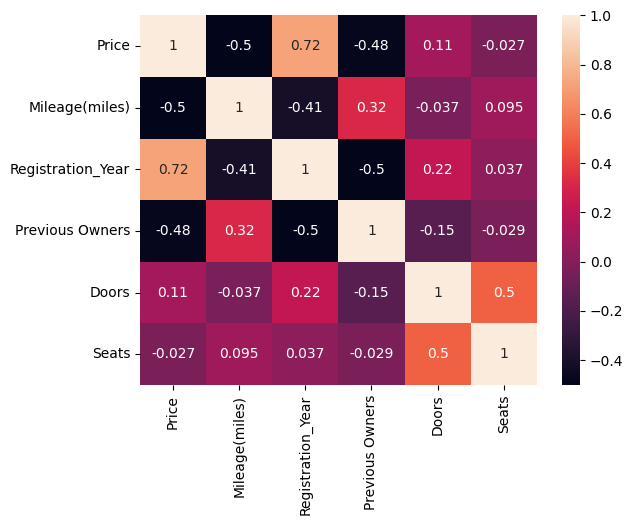

In [137]:
sns.heatmap(car_price.select_dtypes(include='number').corr(), annot=True)

#### Previous Owner
자동차 이전 소유자 수

In [127]:
car_price[car_price['Previous Owners'].notna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
5,HYUNDAI COUPE,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN,South Korea
9,PEUGEOT 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,JEEP CHEROKEE,2750,100000,2004,3.0,Petrol,SUV,3.7L,Automatic,5.0,5.0,Euro 3,NaN,United States
3679,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2L,Automatic,2.0,4.0,Euro 2,Full,Japan
3681,NISSAN QASHQAI,1695,104000,2009,3.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Japan
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France


In [106]:
car_price['Previous Owners'].isna().mean()

0.3826959587740711

#### Engine
엔진 수

In [156]:
car_price['Engine']

0       1.4L
1       1.2L
2       1.4L
3       1.4L
4       1.3L
        ... 
3682    1.6L
3683    2.0L
3684    2.0L
3685    2.2L
3686    1.2L
Name: Engine, Length: 3687, dtype: object

##### 데이터 타입 변경

In [161]:
car_price['Engine'] = car_price['Engine'].str.replace('L', '').astype('float')
car_price.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom


In [162]:
car_price.rename(columns={'Engine' : 'Engine(L)'}, inplace = True)
car_price.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom


#### Doors
자동차 문 수

In [164]:
car_price[car_price['Doors'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
513,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,Unknown,Japan
595,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown,United Kingdom
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,Germany
699,MITSUBISHI FTO,8900,58900,2001,NaN,Petrol,Coupe,2.0,Automatic,NaN,NaN,NaN,Unknown,Japan
823,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,NaN,Unknown,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,Japan
957,NISSAN ELGRAND,4200,96000,2017,3.0,Petrol,Minibus,2.0,Automatic,NaN,7.0,NaN,Unknown,Japan
1038,HONDA JAZZ,6750,33000,2013,NaN,Petrol Hybrid,Hatchback,1.5,Automatic,NaN,5.0,NaN,Unknown,Japan
1058,VOLKSWAGEN POLO,6450,53193,2011,NaN,Petrol,Hatchback,1.2,Automatic,NaN,5.0,NaN,Unknown,Germany


#### Seats
자동차 시트 수

In [173]:
car_price[car_price['Seats'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,Unknown,Sweden
107,CITROEN XM,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2.0,Unknown,France
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,Unknown,Germany
237,MG MIDGET,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,NaN,Unknown,United Kingdom
513,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,Unknown,Japan
645,ROVER MINI,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,NaN,Unknown,United Kingdom
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,Germany
699,MITSUBISHI FTO,8900,58900,2001,NaN,Petrol,Coupe,2.0,Automatic,NaN,NaN,NaN,Unknown,Japan
733,TOYOTA CAMRY,2389,125000,1990,NaN,Petrol,Estate,2.0,Automatic,5.0,NaN,NaN,Unknown,Japan
823,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,NaN,Unknown,Germany


#### Emission Class
자동차 배출 등급

- Euro 뒤에 숫자가 있기 때문에 일단 문자형을 숫자형으로 바꿔준다.
    - Emission Class(Euro)
- 상관관계 분석후 결측치를 채워준다.

In [147]:
car_price[car_price['Emission Class'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,Unknown,Sweden
95,RENAULT FLUENCE,2490,67104,2010,1.0,Diesel,Saloon,1.5L,Manual,4.0,5.0,NaN,Unknown,France
163,HONDA ODYSSEY,2449,88240,2012,NaN,Petrol,MPV,2.4L,Automatic,5.0,7.0,NaN,Unknown,Japan
178,MERCEDES-BENZ CLK,3995,70000,2009,NaN,Petrol,Coupe,2.0L,Automatic,2.0,5.0,NaN,Unknown,Germany
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6L,Automatic,4.0,NaN,NaN,Unknown,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,NISSAN LEAF,5390,60695,2014,NaN,Electric,Hatchback,NaN,Automatic,5.0,5.0,NaN,Unknown,Japan
3464,TOYOTA CARINA,2450,120000,1991,NaN,Petrol,Saloon,1.6L,Manual,4.0,NaN,NaN,Unknown,Japan
3572,ISUZU TROOPER,2250,147700,2001,NaN,Diesel,SUV,NaN,Automatic,5.0,5.0,NaN,Unknown,Japan
3623,VAUXHALL CORSA,13998,28045,2020,NaN,Electric,Hatchback,NaN,Automatic,5.0,5.0,NaN,Unknown,United Kingdom


In [148]:
car_price['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

##### 데이터 타입 변경

In [152]:
car_price['Emission Class'] = car_price['Emission Class'].str.extract('(\d+)').astype('float')
car_price.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,5.0,Unknown,United Kingdom


In [153]:
car_price.rename(columns={'Emission Class' : 'Emission Class(Euro)'}, inplace = True)
car_price.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,5.0,Unknown,United Kingdom


#### Service history
자동차 서비스 이력  

- 자동차 서비스 이력은 NaN, Full로 만 이루어져 있기 때문에 NaN을 Unknown으로 바꾼다.

In [140]:
car_price[car_price['Service history'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
5,HYUNDAI COUPE,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN,South Korea
6,FORD FOCUS,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,NISSAN QASHQAI,1695,104000,2009,3.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,Japan
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany


In [139]:
car_price['Service history'].unique()

array([nan, 'Full'], dtype=object)

In [145]:
car_price['Service history'] = car_price['Service history'].fillna('Unknown')

In [146]:
car_price[car_price['Service history'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country


### 결측치 처리

In [167]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 3687 non-null   object 
 1   Price                 3687 non-null   int64  
 2   Mileage(miles)        3687 non-null   int64  
 3   Registration_Year     3687 non-null   int64  
 4   Previous Owners       2276 non-null   float64
 5   Fuel type             3687 non-null   object 
 6   Body type             3687 non-null   object 
 7   Engine(L)             3642 non-null   float64
 8   Gearbox               3687 non-null   object 
 9   Doors                 3662 non-null   float64
 10  Seats                 3652 non-null   float64
 11  Emission Class(Euro)  3600 non-null   float64
 12  Service history       3687 non-null   object 
 13  country               3687 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 403.4+ KB


In [175]:
car_price.isna().sum()

title                      0
Price                      0
Mileage(miles)             0
Registration_Year          0
Previous Owners         1411
Fuel type                  0
Body type                  0
Engine(L)                 45
Gearbox                    0
Doors                     25
Seats                     35
Emission Class(Euro)      87
Service history            0
country                    0
dtype: int64

<Axes: >

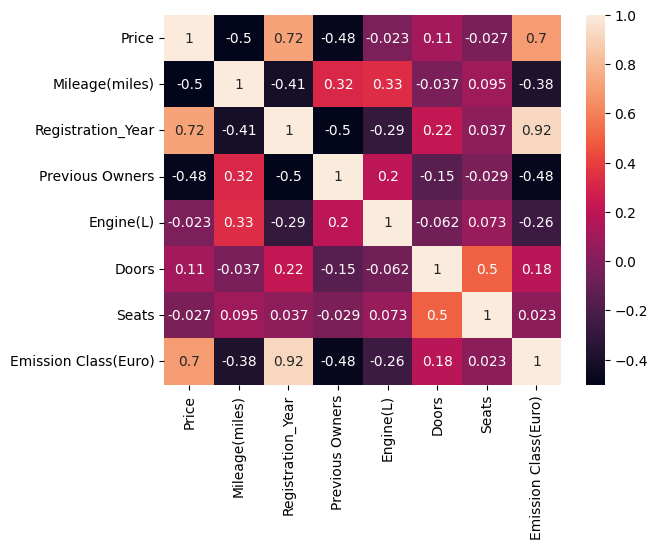

In [174]:
sns.heatmap(car_price.select_dtypes(include='number').corr(), annot=True)

#### 다중 대체법
결측치를 제외한 나머지 값들로 해당 결측치를 알아서 예측하는 방법
- 결측치 처리하는 방법을 찾다가 다중 대체 법이라고 있길래 일단 써봤다..!
- 아직 모르는 점이 많기도 하고, 이거 말고 더 많은 결측치 처리 방법이 있어서 조금 더 공부해봐야 할 거 같다.

In [176]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<Axes: >

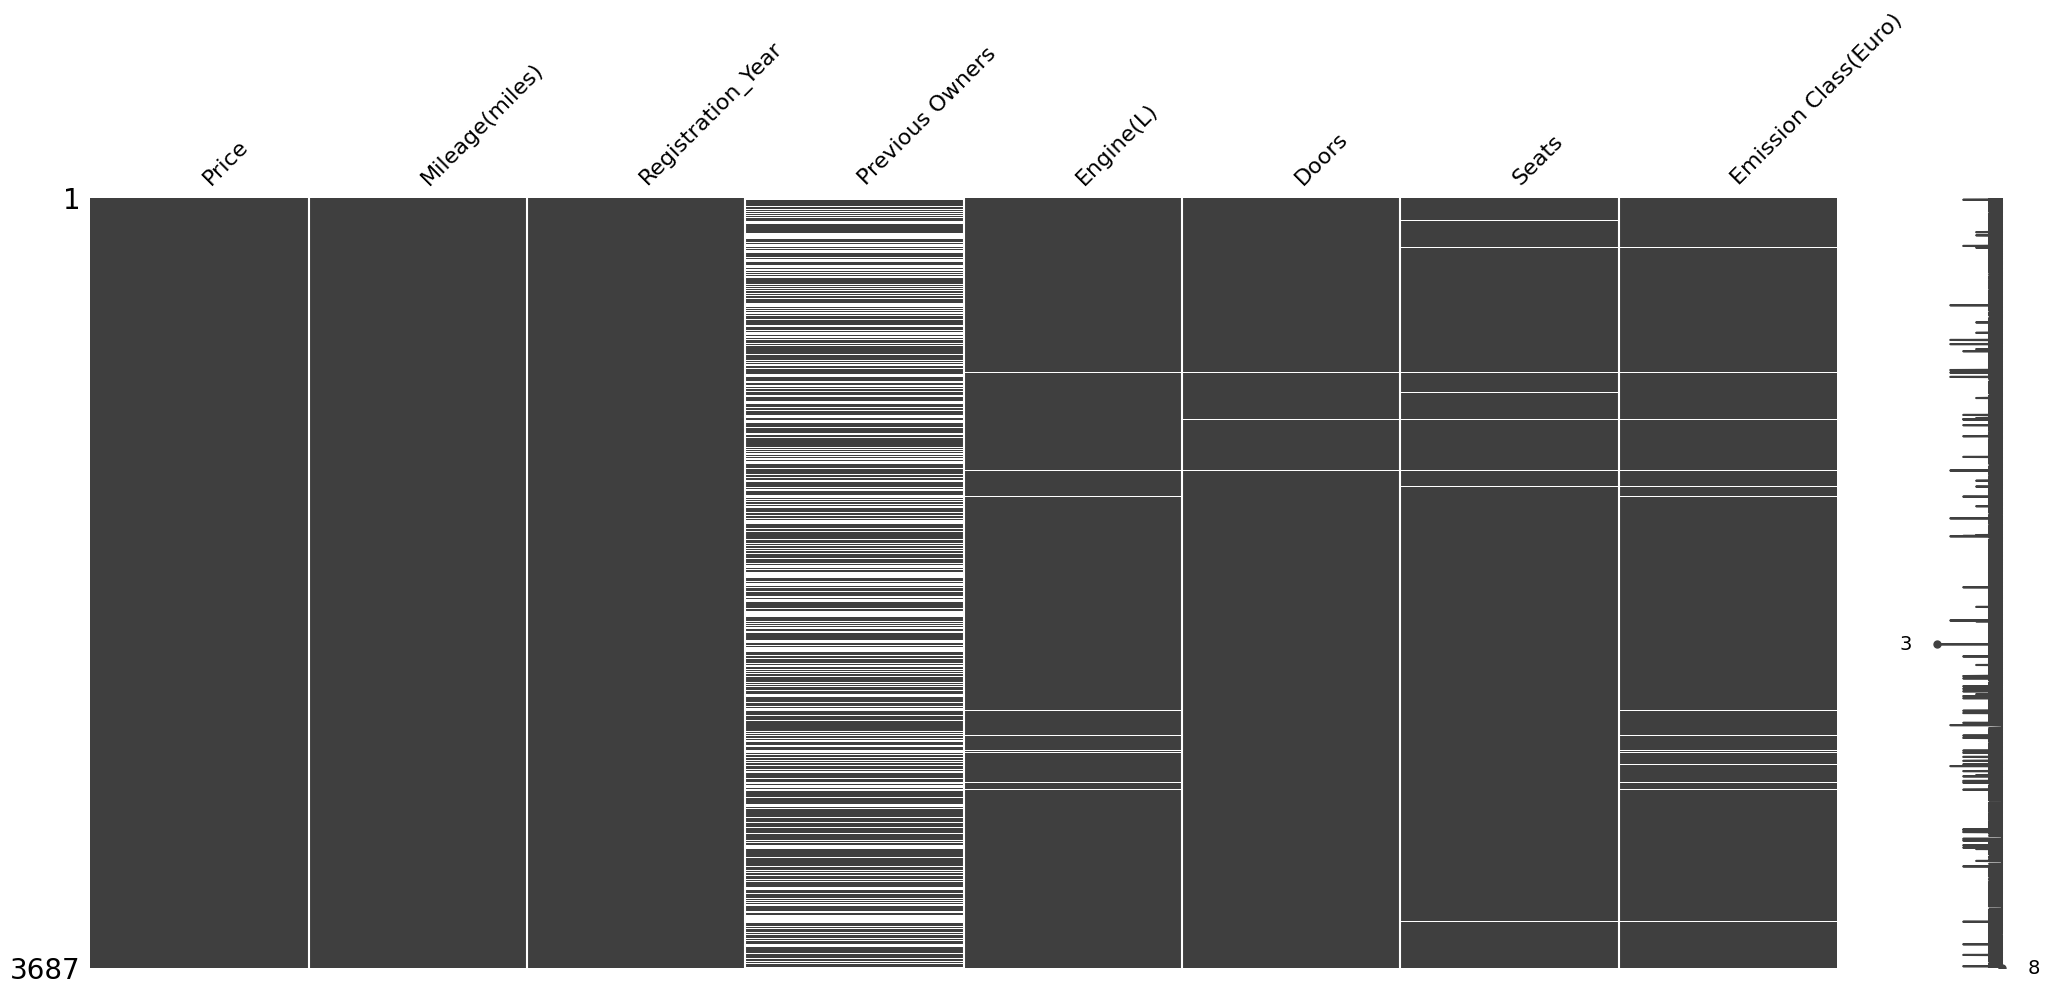

In [183]:
import missingno as msno
df = car_price.copy()
df = df.select_dtypes(include='number')
msno.matrix(df)

In [184]:
df_impute = pd.DataFrame(IterativeImputer(random_state=1234).fit_transform(df))
df_impute.columns = df.columns
df_impute.head()
df = df_impute

<Axes: >

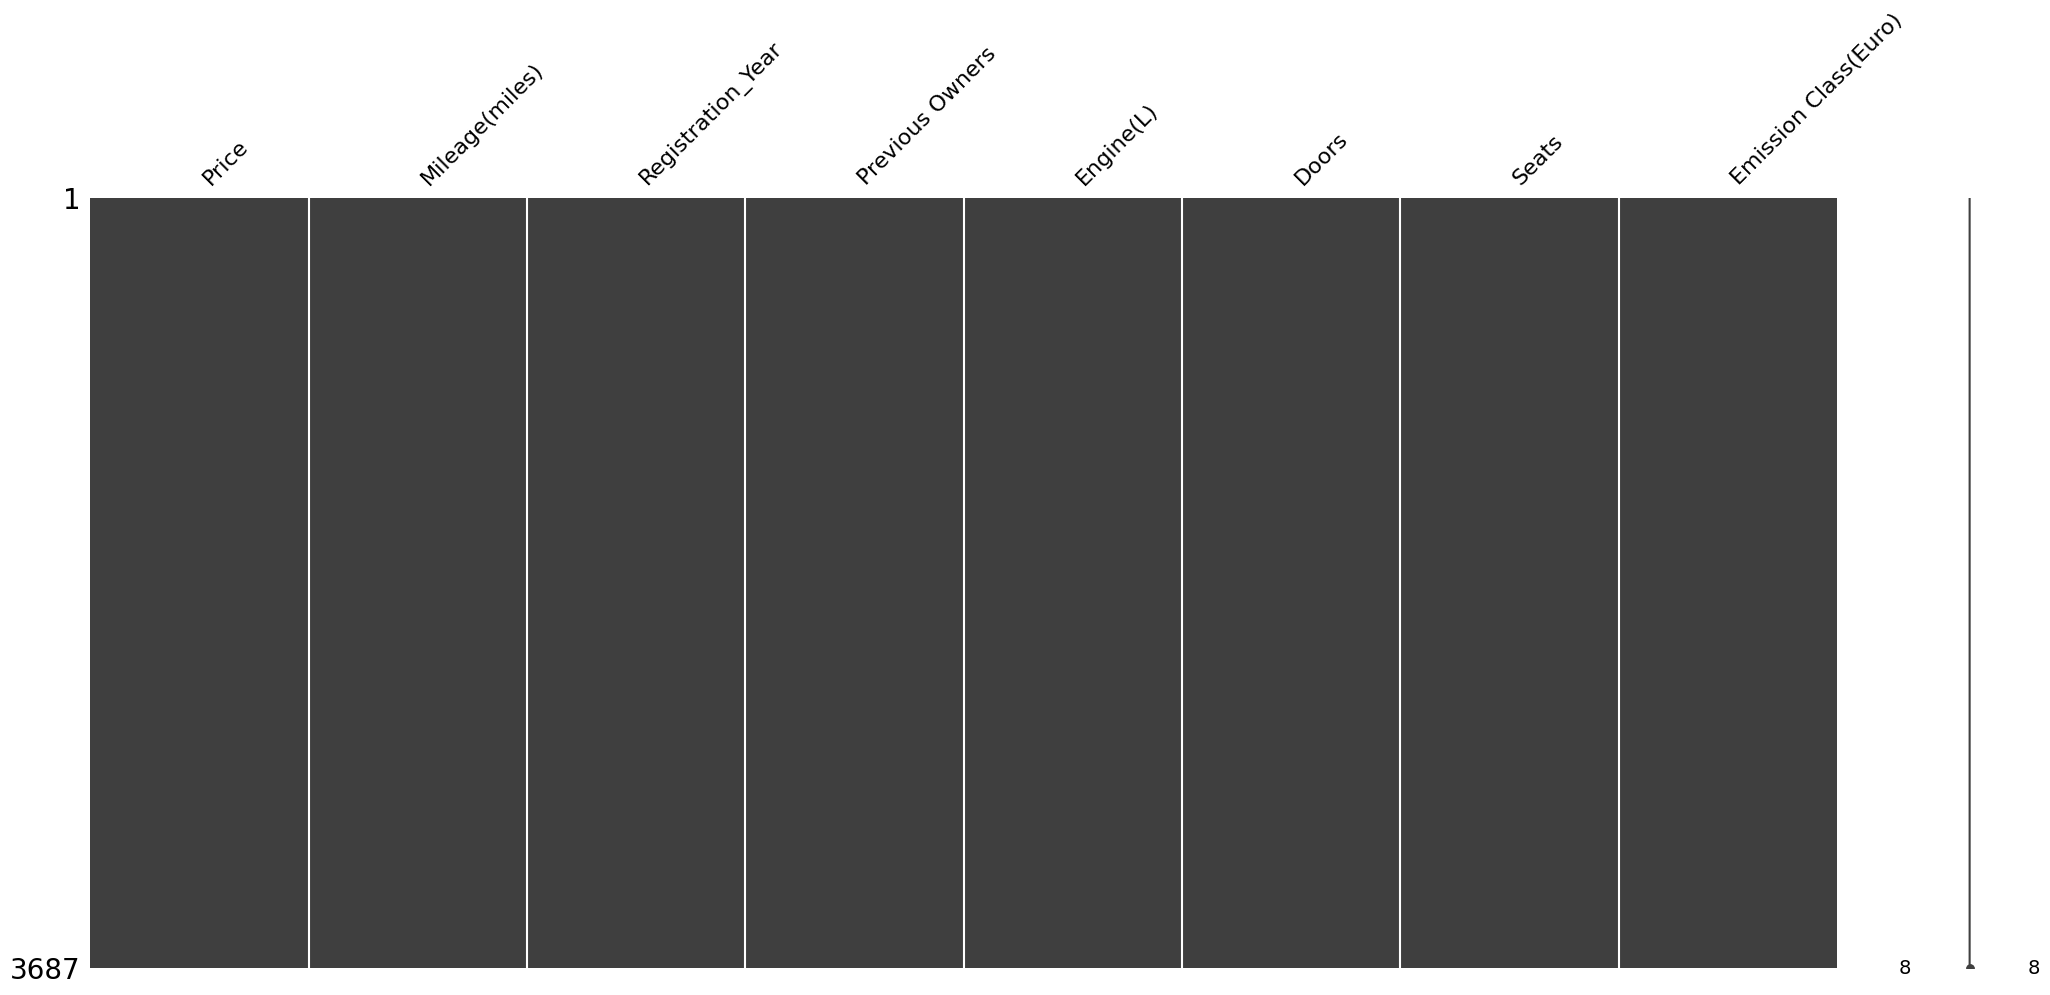

In [185]:
msno.matrix(df)

In [186]:
df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro)
0,6900.0,70189.0,2016.0,3.000000,1.4,5.0,5.0,6.0
1,1495.0,88585.0,2008.0,4.000000,1.2,3.0,5.0,4.0
2,949.0,137000.0,2011.0,3.317457,1.4,5.0,5.0,5.0
3,2395.0,96731.0,2010.0,5.000000,1.4,3.0,4.0,4.0
4,1000.0,85000.0,2013.0,3.060290,1.3,5.0,5.0,5.0


#### 데이터 병합

- 이렇게 귀찮게 하는 이유는 merge의 on 써서 했는데 데이터가 엄청 늘어났기 때문이다.
- 중복도 제거해봐도 늘어난 데이터가 사라지지 않았다.
- 그래서 칼럼 삭제해서 concat 하는 게 제일 낫다고 판단했기 때문이다.

In [188]:
df.columns

Index(['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
       'Engine(L)', 'Doors', 'Seats', 'Emission Class(Euro)'],
      dtype='object')

In [215]:
car_price.columns

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine(L)', 'Gearbox',
       'Doors', 'Seats', 'Emission Class(Euro)', 'Service history', 'country'],
      dtype='object')

In [217]:
# 숫자타입 칼럼만 뽑기
num_col = car_price.select_dtypes(include='number').columns
num_col

Index(['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
       'Engine(L)', 'Doors', 'Seats', 'Emission Class(Euro)'],
      dtype='object')

In [218]:
# 숫자타입 칼럼 drop
car_price.drop(columns=num_col, inplace=True)

In [219]:
# 결측치 없는 데이터와 병합하기
car_price = pd.concat([car_price, df], axis=1)
car_price.isna().sum()

title                   0
Fuel type               0
Body type               0
Gearbox                 0
Service history         0
country                 0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners         0
Engine(L)               0
Doors                   0
Seats                   0
Emission Class(Euro)    0
dtype: int64

In [220]:
# 칼럼 재배치
car_price = car_price[['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine(L)', 'Gearbox',
       'Doors', 'Seats', 'Emission Class(Euro)', 'Service history', 'country']]
car_price

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
0,SKODA FABIA,6900.0,70189.0,2016.0,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495.0,88585.0,2008.0,4.000000,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949.0,137000.0,2011.0,3.317457,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395.0,96731.0,2010.0,5.000000,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000.0,85000.0,2013.0,3.060290,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395.0,76202.0,2006.0,4.000000,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,France
3683,AUDI A4,6990.0,119000.0,2012.0,2.931077,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3684,BMW 3 SERIES,3995.0,139000.0,2013.0,3.169018,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3685,HONDA ACCORD,1390.0,179190.0,2007.0,3.886877,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,Japan


#### Previous Owners

- 위의 데이터를 확인하게 되면 결측치 처리된 부분은 3.3..., 2.9... 이런식이라서 반올림해서 3.0, 3.0, ... 이런 식으로 처리할 것이다.

In [221]:
car_price['Previous Owners'] = car_price['Previous Owners'].round(0)
car_price

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country
0,SKODA FABIA,6900.0,70189.0,2016.0,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,VAUXHALL CORSA,1495.0,88585.0,2008.0,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,HYUNDAI I30,949.0,137000.0,2011.0,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,MINI HATCH,2395.0,96731.0,2010.0,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,VAUXHALL CORSA,1000.0,85000.0,2013.0,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395.0,76202.0,2006.0,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,France
3683,AUDI A4,6990.0,119000.0,2012.0,3.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3684,BMW 3 SERIES,3995.0,139000.0,2013.0,3.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3685,HONDA ACCORD,1390.0,179190.0,2007.0,4.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,Japan


### 이상치

- 이상치는 그대로 두기로 결정하였다.
- 가격, 거리 등등 모두 차에 따라 다른 게 맞다? 생각했기 때문이다.

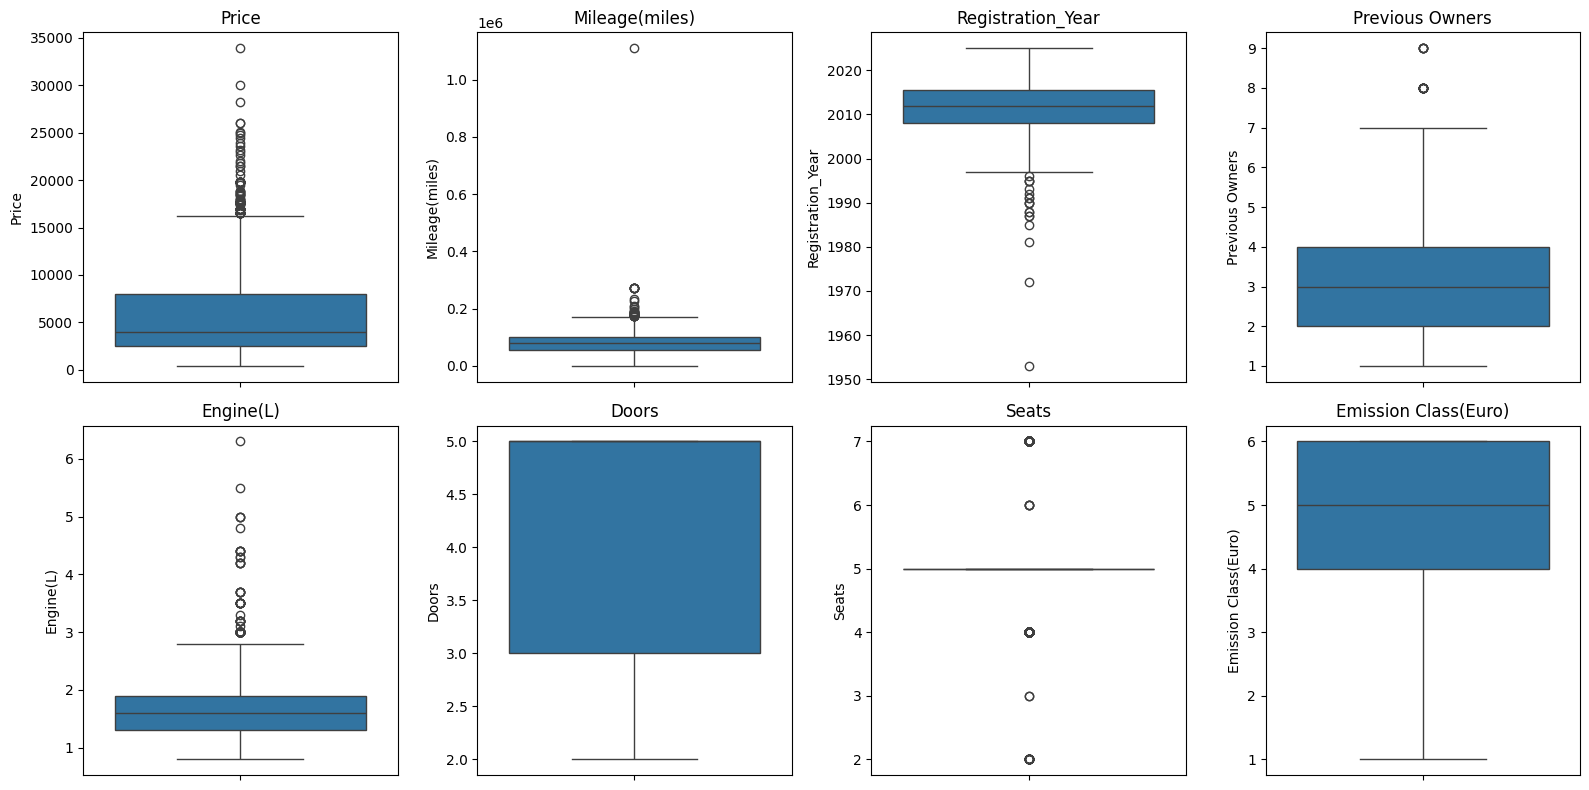

In [182]:
# 숫자 컬럼만 선택
numerical_cols = car_price.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(car_price[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

## 집계 및 그룹화

In [222]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 3687 non-null   object 
 1   Price                 3687 non-null   float64
 2   Mileage(miles)        3687 non-null   float64
 3   Registration_Year     3687 non-null   float64
 4   Previous Owners       3687 non-null   float64
 5   Fuel type             3687 non-null   object 
 6   Body type             3687 non-null   object 
 7   Engine(L)             3687 non-null   float64
 8   Gearbox               3687 non-null   object 
 9   Doors                 3687 non-null   float64
 10  Seats                 3687 non-null   float64
 11  Emission Class(Euro)  3687 non-null   float64
 12  Service history       3687 non-null   object 
 13  country               3687 non-null   object 
dtypes: float64(8), object(6)
memory usage: 403.4+ KB


### 가격 평균 구하기

In [223]:
price_mean_by_fuel_type = car_price.groupby('Fuel type')['Price'].mean()
price_mean_by_fuel_type

Fuel type
Diesel                    6206.506153
Diesel Hybrid            23220.000000
Electric                  5942.161290
Petrol                    5313.400508
Petrol Hybrid            10849.148936
Petrol Plug-in Hybrid    18683.666667
Name: Price, dtype: float64

<Axes: ylabel='Fuel type'>

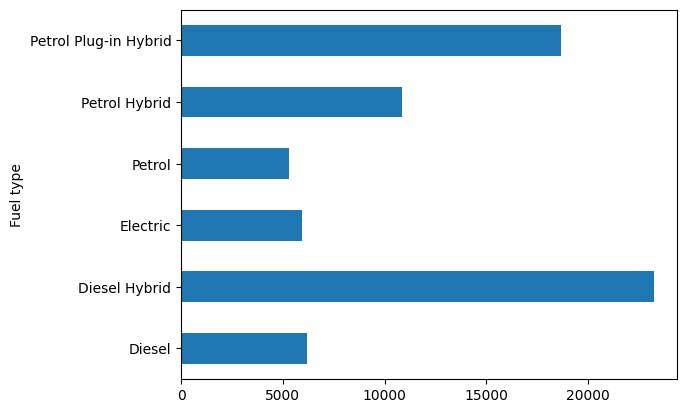

In [269]:
price_mean_by_fuel_type.plot(kind='barh')

### 도어 수(Doors)별 차량의 수 세기

In [224]:
car_count_by_doors = car_price.groupby('Doors')['title'].count()
car_count_by_doors

Doors
0.274785       1
2.000000     216
3.000000     735
3.680367       1
3.745427       1
3.861369       1
4.000000     367
4.074869       1
4.086585       1
4.091699       1
4.155976       1
4.189512       1
4.294050       1
4.312638       1
4.333047       1
4.340052       1
4.379077       1
4.401393       1
4.414266       1
4.418945       1
4.443343       1
4.447645       1
4.481441       1
4.526825       1
4.527207       1
4.577717       1
4.731749       1
5.000000    2344
6.308145       1
Name: title, dtype: int64

<Axes: xlabel='Doors'>

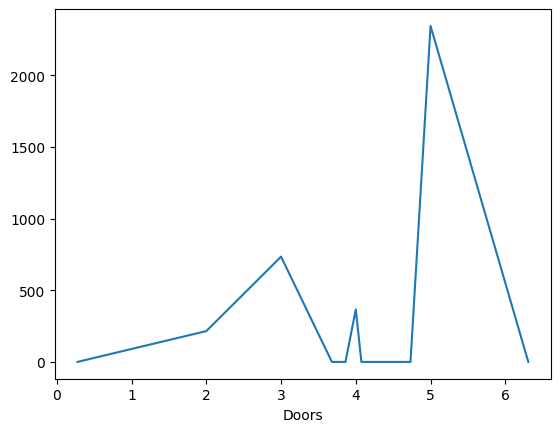

In [276]:
car_count_by_doors.plot(kind='line')

### 연료 타입(Fuel type)별 등록 연도(Registration_Year)의 최소값과 최대값 구하기

In [225]:
registration_year_range_by_fuel_type = car_price.groupby('Fuel type')['Registration_Year'].agg(['min', 'max'])
registration_year_range_by_fuel_type

,min,max
Fuel type,,
Diesel,1995.0,2021.0
Diesel Hybrid,2020.0,2020.0
Electric,2014.0,2021.0
Petrol,1953.0,2025.0
Petrol Hybrid,2003.0,2022.0
Petrol Plug-in Hybrid,2014.0,2021.0


<Axes: ylabel='Fuel type'>

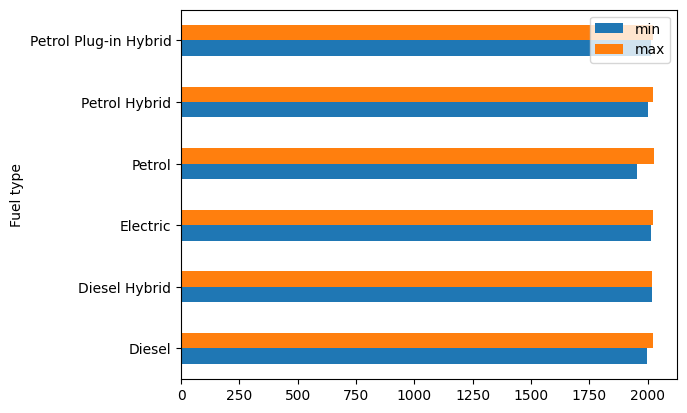

In [279]:
registration_year_range_by_fuel_type.plot(kind='barh')

### 서비스 히스토리(Service history)가 있는 차량과 없는 차량의 평균 가격 비교

In [226]:
price_mean_by_service_history = car_price.groupby('Service history')['Price'].mean()
price_mean_by_service_history

Service history
Full       7290.209259
Unknown    5529.414045
Name: Price, dtype: float64

<Axes: ylabel='Price'>

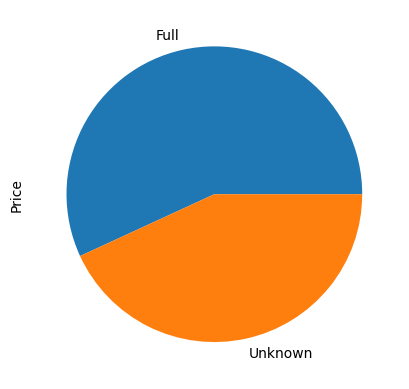

In [281]:
price_mean_by_service_history.plot(kind='pie')

### 각 국가(country)에서 등록된 차량의 수

In [227]:
car_count_by_country = car_price.groupby('country')['title'].count()
car_count_by_country

country
Czech Republic     63
France            523
Germany           863
Italy             128
Japan             641
Malaysia            3
Romania            14
South Korea       178
Spain              60
Sweden             47
United Kingdom    728
United States     439
Name: title, dtype: int64

<Axes: ylabel='title'>

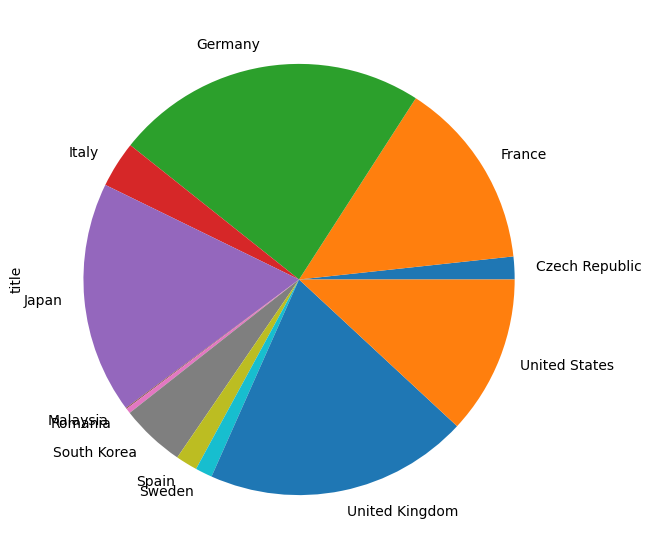

In [293]:
plt.figure(figsize=(20, 7))
car_count_by_country.plot(kind='pie')

### 각 국가(country)에서 가장 비싼 차량의 정보 찾기

In [229]:
most_expensive_car_by_country = car_price.loc[car_price.groupby('country')['Price'].idxmax(), ['country', 'title', 'Price']]
most_expensive_car_by_country

,country,title,Price
2793,Czech Republic,SKODA KAROQ ESTATE,20999.0
2183,France,DS AUTOMOBILES DS 9,24770.0
3212,Germany,MERCEDES-BENZ GLE CLASS,33900.0
2045,Italy,ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,17000.0
3213,Japan,MAZDA MAZDA6 TOURER,23910.0
2026,Malaysia,PROTON PROTON,3995.0
3151,Romania,DACIA DUSTER ESTATE,14899.0
2231,South Korea,HYUNDAI TUCSON,20500.0
3102,Spain,SEAT ATECA,25995.0
3223,Sweden,VOLVO V60,9990.0


<Axes: >

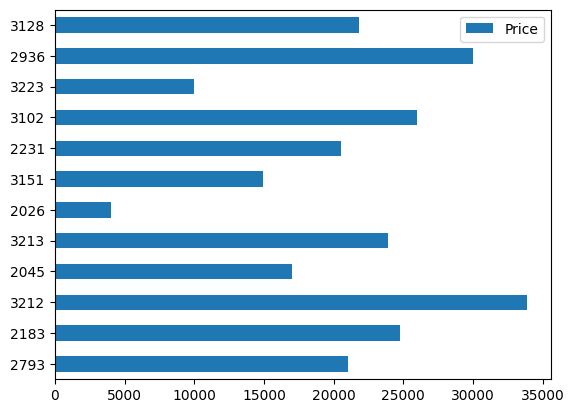

In [298]:
most_expensive_car_by_country.plot(kind='barh')

### 차량의 연료 타입(Fuel type)별로 가장 많이 등록된 연도(Registration_Year) 찾기

In [228]:
most_registered_year_by_fuel_type = car_price.groupby('Fuel type')['Registration_Year'].idxmax()
most_registered_year_cars = car_price.loc[most_registered_year_by_fuel_type, ['Fuel type', 'Registration_Year']]
most_registered_year_cars

,Fuel type,Registration_Year
3061,Diesel,2021.0
3122,Diesel Hybrid,2020.0
2194,Electric,2021.0
8,Petrol,2025.0
2080,Petrol Hybrid,2022.0
2183,Petrol Plug-in Hybrid,2021.0


<Axes: ylabel='Density'>

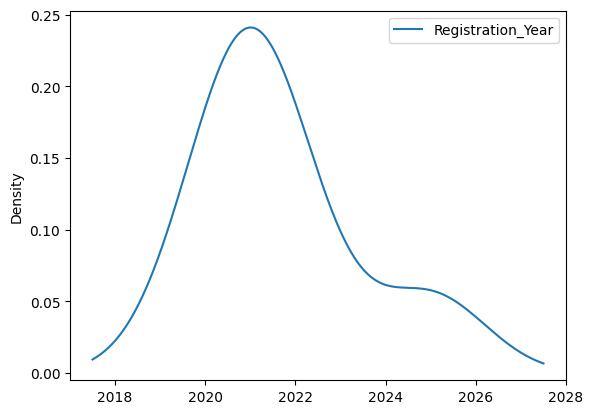

In [301]:
most_registered_year_cars.plot(kind='density')

## 스케일링

### 로그 스케일링

In [231]:
log_df = car_price.copy()
log_df['Price_log'] = np.log(log_df['Price'])
log_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,country,Price_log
0,SKODA FABIA,6900.0,70189.0,2016.0,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic,8.839277
1,VAUXHALL CORSA,1495.0,88585.0,2008.0,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom,7.309881
2,HYUNDAI I30,949.0,137000.0,2011.0,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea,6.855409
3,MINI HATCH,2395.0,96731.0,2010.0,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom,7.781139
4,VAUXHALL CORSA,1000.0,85000.0,2013.0,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom,6.907755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395.0,76202.0,2006.0,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,France,7.240650
3683,AUDI A4,6990.0,119000.0,2012.0,3.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany,8.852236
3684,BMW 3 SERIES,3995.0,139000.0,2013.0,3.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany,8.292799
3685,HONDA ACCORD,1390.0,179190.0,2007.0,4.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,Japan,7.237059


### RobustScaler

In [241]:
# 숫자 칼럼만 저장
num_car = car_price.copy()
num_col = num_car.select_dtypes(include='object').columns
num_col

Index(['title', 'Fuel type', 'Body type', 'Gearbox', 'Service history',
       'country'],
      dtype='object')

In [242]:
num_car.drop(columns=num_col, inplace=True)
num_car

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro)
0,6900.0,70189.0,2016.0,3.0,1.4,5.0,5.0,6.0
1,1495.0,88585.0,2008.0,4.0,1.2,3.0,5.0,4.0
2,949.0,137000.0,2011.0,3.0,1.4,5.0,5.0,5.0
3,2395.0,96731.0,2010.0,5.0,1.4,3.0,4.0,4.0
4,1000.0,85000.0,2013.0,3.0,1.3,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
3682,1395.0,76202.0,2006.0,4.0,1.6,5.0,5.0,4.0
3683,6990.0,119000.0,2012.0,3.0,2.0,4.0,5.0,5.0
3684,3995.0,139000.0,2013.0,3.0,2.0,4.0,5.0,5.0
3685,1390.0,179190.0,2007.0,4.0,2.2,5.0,5.0,4.0


In [232]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

In [243]:
rs.fit(num_car)

RobustScaler()

In [246]:
rs_df = rs.transform(num_car)
rs_df

array([[ 5.26793824e-01, -2.13208449e-01,  5.33333333e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [-4.55040872e-01,  1.86565542e-01, -5.33333333e-01, ...,
        -1.00000000e+00,  0.00000000e+00, -5.00000000e-01],
       [-5.54223433e-01,  1.23869958e+00, -1.33333333e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.08265213e-04,  1.28216273e+00,  1.33333333e-01, ...,
        -5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [-4.74114441e-01,  2.15555459e+00, -6.66666667e-01, ...,
         0.00000000e+00,  0.00000000e+00, -5.00000000e-01],
       [-3.63306085e-01,  4.69401947e-02,  1.33333333e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [248]:
rs_df = pd.DataFrame(rs_df)
rs_df

,0,1,2,3,4,5,6,7
0,0.526794,-0.213208,0.533333,0.0,-0.333333,0.0,0.0,0.5
1,-0.455041,0.186566,-0.533333,0.5,-0.666667,-1.0,0.0,-0.5
2,-0.554223,1.238700,-0.133333,0.0,-0.333333,0.0,0.0,0.0
3,-0.291553,0.363591,-0.266667,1.0,-0.333333,-1.0,-1.0,-0.5
4,-0.544959,0.108658,0.133333,0.0,-0.500000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3682,-0.473206,-0.082537,-0.800000,0.5,0.000000,0.0,0.0,-0.5
3683,0.543143,0.847531,0.000000,0.0,0.666667,-0.5,0.0,0.0
3684,-0.000908,1.282163,0.133333,0.0,0.666667,-0.5,0.0,0.0
3685,-0.474114,2.155555,-0.666667,0.5,1.000000,0.0,0.0,-0.5


### MinMaxScaler

In [249]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

In [250]:
mm_df = mm.fit_transform(num_car)
mm_df

array([[0.19402985, 0.06322679, 0.875     , ..., 0.78318128, 0.6       ,
        0.89026481],
       [0.03268657, 0.07979829, 0.76388889, ..., 0.45169105, 0.6       ,
        0.74404221],
       [0.01638806, 0.12341152, 0.80555556, ..., 0.78318128, 0.6       ,
        0.81715351],
       ...,
       [0.10731343, 0.12521316, 0.83333333, ..., 0.61743616, 0.6       ,
        0.81715351],
       [0.02955224, 0.16141713, 0.75      , ..., 0.78318128, 0.6       ,
        0.74404221],
       [0.04776119, 0.07401052, 0.83333333, ..., 0.78318128, 0.6       ,
        0.81715351]])

In [251]:
mm_df = pd.DataFrame(mm_df)
mm_df

,0,1,2,3,4,5,6,7
0,0.194030,0.063227,0.875000,0.333333,0.109091,0.783181,0.6,0.890265
1,0.032687,0.079798,0.763889,0.444444,0.072727,0.451691,0.6,0.744042
2,0.016388,0.123412,0.805556,0.333333,0.109091,0.783181,0.6,0.817154
3,0.059552,0.087136,0.791667,0.555556,0.109091,0.451691,0.4,0.744042
4,0.017910,0.076569,0.833333,0.333333,0.090909,0.783181,0.6,0.817154
...,...,...,...,...,...,...,...,...
3682,0.029701,0.068643,0.736111,0.444444,0.145455,0.783181,0.6,0.744042
3683,0.196716,0.107197,0.819444,0.333333,0.218182,0.617436,0.6,0.817154
3684,0.107313,0.125213,0.833333,0.333333,0.218182,0.617436,0.6,0.817154
3685,0.029552,0.161417,0.750000,0.444444,0.254545,0.783181,0.6,0.744042


## 주성분 분석(PCA)

In [265]:
from sklearn.decomposition import PCA

pca = PCA()

In [266]:
pca_df = pca.fit_transform(num_car)
pca_df

array([[-1.11850098e+04,  4.72166589e+02, -3.29632965e+00, ...,
         1.09495274e-01, -4.65938969e-02,  3.67255359e-01],
       [ 7.49063233e+03, -3.86917966e+03,  5.77060918e-01, ...,
        -3.72125975e-01,  5.55116861e-01, -1.93258832e-01],
       [ 5.58572902e+04, -1.63831965e+03, -3.62005637e+00, ...,
         2.68683001e-01,  9.88372955e-02,  2.12240742e-01],
       ...,
       [ 5.76793523e+04,  1.51734342e+03, -3.04642816e+00, ...,
        -2.17851402e-01, -2.08935551e-01, -2.18116817e-01],
       [ 9.79525980e+04,  1.22098896e+03,  5.78412644e-01, ...,
         2.61361873e-01, -2.00740928e-01, -9.52349559e-02],
       [ 1.04724684e+03, -3.73339558e+03, -3.83422769e+00, ...,
         3.17510967e-01,  2.56691818e-01, -3.56127854e-02]])

In [267]:
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7
0,-11185.009791,472.166589,-3.296330,0.354633,-0.714203,0.109495,-0.046594,0.367255
1,7490.632329,-3869.179663,0.577061,0.920903,0.670689,-0.372126,0.555117,-0.193259
2,55857.290247,-1638.319654,-3.620056,-0.605920,-0.197790,0.268683,0.098837,0.212241
3,15571.628154,-2503.593936,-0.590565,2.211184,0.433924,0.504330,0.167455,-0.554132
4,3939.911422,-4568.913195,-5.067242,-0.277302,-0.371792,0.155348,-0.054535,-0.145750
...,...,...,...,...,...,...,...,...
3682,-4866.262558,-4679.017638,2.449053,-0.266410,-0.954345,0.189269,-0.043279,0.184588
3683,37540.530913,3360.679503,0.512328,0.270609,0.193149,-0.208376,-0.093506,0.031972
3684,57679.352262,1517.343419,-3.046428,0.248558,0.409109,-0.217851,-0.208936,-0.218117
3685,97952.598012,1220.988956,0.578413,-0.301307,-0.649281,0.261362,-0.200741,-0.095235


In [268]:
(pca.explained_variance_ratio_).sum()

0.9999999999999998

## 회고

오늘은 여태 배웠던거를 복습하는 느낌이였다.  
데이터가 전에 했던 프로젝트보다 양이 적었지만 결측치가 훨씬 많아 어떻게 처리를 할지 고민을 많이했다.  
결측치 처리는 부분은 항상 시간이 제일 많이 드는 작업인 거 같다.  
주관적?이라서 이 부분이 데이터를 조금 더 자세히 알고 있었다면 금방 해겼을까 ? 싶기도 하고,  
차라리 결측치 처리에 정답이 있었으면 좋겠다 싶었다.  

오늘 새로운 다중 대체법이라는 방법을 알게 되었는데 일단 써보고 나중에 이론? 정리를 해봐야할 거 같다.  
더 많은 걸 알면 더 좋은 데이터가 되지 않을까 ?  라는 생각이 들었다.
이렇게 생각하니까 공부에는 끝이 없는데 시간은 한정적이라 아쉽다.  

다음엔 어떤 방식으로 결측치를 처리해볼지 고민이다.  
매 프로젝트마다 새로운 결측치 처리 방법 시도하기! 약간 나만의 도전과제 느낌으로 하니까 힘들기도 하지만 재밌기도 하다.  
음,,, 정답이 없어서 다양한 방법을 쓸 수 있다는 건 장점이라고 생각한다.  

얼렁뚱땅 프로젝트 -완-
